<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Learning_Best_Practices_for_Model_Evaluation_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('data.csv',header=0)
df=df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [23]:

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=1,test_size=0.2)

#Create pipeline

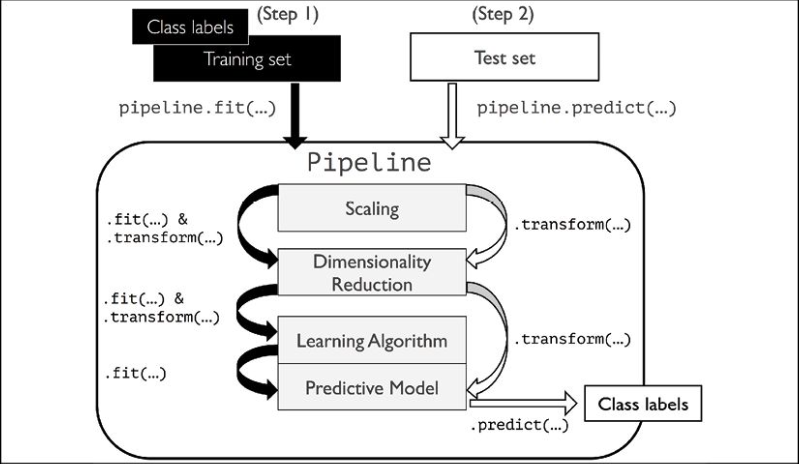

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1,solver='lbfgs'))
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.956140350877193

# Using k-fold validation to assess model performace


**Holdout validation** and **k-fold validation** technique to obtain reliable estimate

Model selection: tuning and comparing different hyperameter setting. (optimal value for hyperameter)

If we reuse the same test data over and over again, it will become part of your train_set and the model is likely to overfit. (train on train_set, then predict with X_test, then tuning...)

Holdout method: plit dataset into 3 part: train, validation, test set. the performance in validation is use for model selection. This way can obtain less biased.

The draw_back of Holdout method: sensitive to how we partition the train to train and valid set.
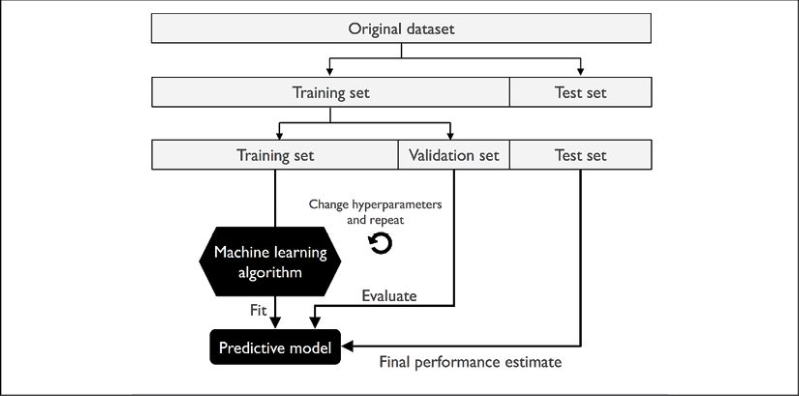



K-fold validation: split the training dataset into k folds without replacement, k-1 fold use for training, the last fold use for performance evaluation.

* Do this for k times

At the end, we obtain k model and their score on the last fold. we then averaged the score and then parameter tunning.
We then do last performance for test set.

Pro: the model only see data examples exactly one times.
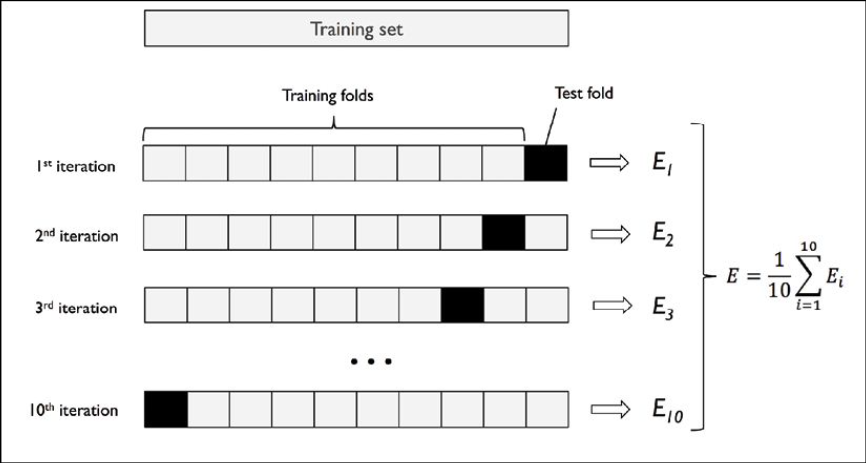

Standard k folds is 10. For smaller dataset, increase k folds make lower the bias, higher the variance since more data are use to train.

For large dataset, decrease k fold

Leave one out cross validation (LOOCV): we set k=n number of training example. the each fold contain 1 training example -> only use for very small dataset.



Another improvement of k-fold is stratify k fold. especially work for unequal proportion.


In [28]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10).split(X_train,y_train)
scores=[]
for k,(train,test) in enumerate(kfold):
  pipeline.fit(X_train[train],y_train[train])
  score=pipeline.score(X_train[test],y_train[test])
  scores.append(score)
  print(k+1,'fold, score:',score)
scores=np.array(scores)
m=scores.mean()
std=scores.std()
print(m,'+-',std)

1 fold, score: 0.9347826086956522
2 fold, score: 0.9347826086956522
3 fold, score: 0.9565217391304348
4 fold, score: 0.9565217391304348
5 fold, score: 0.9347826086956522
6 fold, score: 0.9555555555555556
7 fold, score: 0.9777777777777777
8 fold, score: 0.9333333333333333
9 fold, score: 0.9555555555555556
10 fold, score: 0.9555555555555556
0.9495169082125603 +- 0.013854294239660376


In [34]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipeline, X=X_train, y=y_train,cv=10,n_jobs=1)
print(scores)
m=scores.mean()
std=scores.std()
print(m,'+-',std)

[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
0.9495169082125603 +- 0.013854294239660376


# debugging alogrithm with learning and validation curves. 

learning curve and validation curves tell us wether model has underfitting or overfitting. 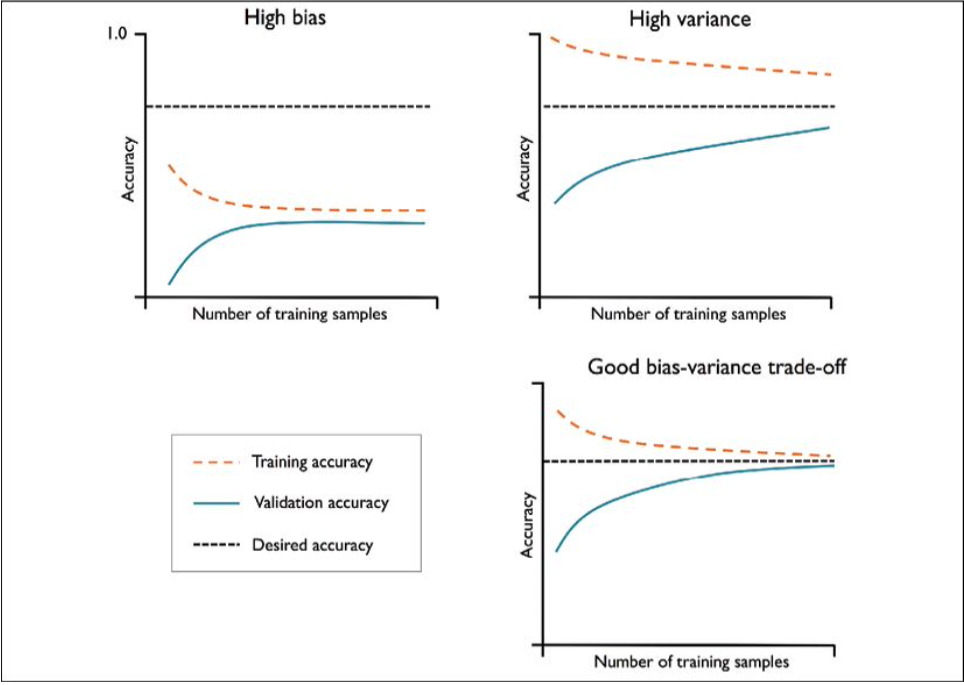